In [1]:
%matplotlib inline
from plots import *
import matplotlib
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
plt.style.use("bmh")
print('Matplotlib Version:', matplotlib.__version__)


Matplotlib Version: 3.0.3


In [2]:
PATH = 'ep-10steps-10samples'
df = pd.read_csv('results/log-%s.txt' % PATH, sep=',  ', engine='python')
SAMPLE_SIZE = 10

DB_eta = np.load('neurips/DB_eta.npy')
DB_z = np.load('neurips/DB_z.npy')
ess = np.load('neurips/esss.npy')
NUM_SAMPLES = 10

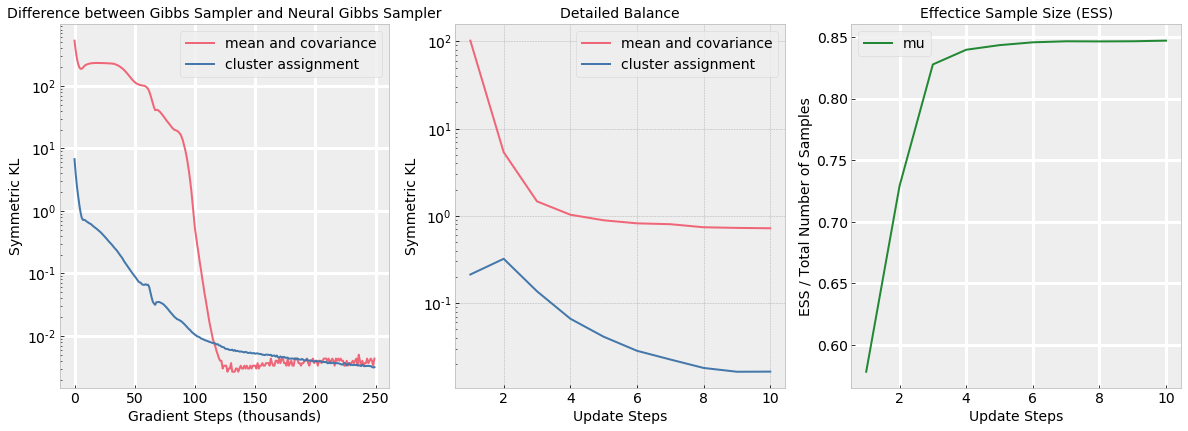

In [54]:
fig = plt.figure(figsize=(6.7*3, 6.7))
fig.tight_layout()
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_yscale("log")
ax1.plot((df["KL_eta_ex"].values + df["KL_eta_in"].values) / 3, c='#EE6677', label='mean and covariance')
ax1.plot((df["KL_z_ex"].values + df["KL_z_in"].values) / 60 , c='#4477AA', label='cluster assignment')
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("Symmetric KL",fontsize=14)
ax1.set_xlabel('Gradient Steps (thousands)', fontsize=14)
ax1.grid(color='w', linestyle='-', linewidth=3)
ax1.grid(color='w', linestyle='-', linewidth=3)
ax1.set_title('Difference between Gibbs Sampler and Neural Gibbs Sampler', fontsize=14)
steps = np.arange(10) + 1
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_yscale("log")
ax2.plot(steps, DB_eta.mean(0) / 3, c='#EE6677', label='mean and covariance')
ax2.plot(steps, DB_z.mean(0) / 60, c='#4477AA', label='cluster assignment')
ax2.tick_params(labelsize=14)
ax2.legend(fontsize=14)
ax2.set_xlabel('Update Steps', fontsize=14)
ax2.set_ylabel("Symmetric KL", fontsize=14)
ax2.set_title('Detailed Balance', fontsize=14)
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(steps, ess.mean(0)[1:] / NUM_SAMPLES, c='#228833', label='mu')

ax3.legend(fontsize=14)
ax3.tick_params(labelsize=14)
ax3.set_ylabel("ESS / Total Number of Samples",fontsize=14)
ax3.set_xlabel('Update Steps', fontsize=14)
ax3.grid(color='w', linestyle='-', linewidth=3)
ax3.grid(color='w', linestyle='-', linewidth=3)
ax3.set_title('Effectice Sample Size (ESS)', fontsize=14)
plt.savefig('results/DB-' + PATH + '.svg')